# Unified Plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pi0scaling = {"val": 0, "suffix": "", "title": "No pi0 Scaling"} #no scaling
#pi0scaling = {"val": 1, "suffix": "_pi0flat", "title": "0.759 pi0 Scaling"} #flat scaling
#pi0scaling = {"val": 2, "suffix": "_pi0e040", "title": r"$\pi^0$ scaling: [$1 - 0.40 \times E_\pi$]"} #energy-dependent


In [3]:
from matplotlib import pyplot as plt

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

from load_data_run123 import *
from unblinding_far_sideband import *

In [4]:
import sys
import localSettings as ls
print(ls.main_path)
print(ls.ntuple_path)
main_path = ls.main_path
sys.path.append(main_path)

/uboone/app/users/cthorpe/PELEE/
/uboone/data/users/cthorpe/PELEE/


In [5]:
import scipy.stats

In [6]:
#which_sideband = ['np_far'       ,"farsideband"] # far-sideband 1eNp datasets
#which_sideband = ['0p_far'       ,"farsideband"] # far-sideband 1eNp datasets
#which_sideband = ['numu',"numu"] # numu NTuples [v41]
#which_sideband = ['2plus_showers',"farsideband"] # far-sideband 2+ shower datasets
#which_sideband = ['np_sb_comb',"farsideband"] # combined far-sideband 1eNp and 2+ shower datasets
#which_sideband = ['opendata'     ,'opendata']    # open datasets (5e19 / 1e19)
which_sideband = ['opendata'     ,'fakeset1']    # set1 fake dataset
#which_sideband = ['fulldata'     ,'fulldata']    # full data
#which_sideband = ['run4opendata','run4opendata']

In [7]:
samples = load_data_run123(which_sideband=which_sideband[0],
                           return_plotter=False,
                           pi0scaling=pi0scaling["val"],
                           loadpi0variables=False,
                           loadtruthfilters=True,
                           loadshowervariables=True,
                           loadnumuntuples=False,
                           loadnumuvariables=False,
                           loadfakedata=0,
                           USEBDT=True,
                           loadsystematics=True,
                           loadrecoveryvars=True)


Getting Variables!
Loading uproot files
Loading Run3 dataframes
r3data has shape :  (340, 184)


/uboone/app/users/cthorpe/PELEE/load_data_run123.py:263: RuntimeWarning: invalid value encountered in true_divide
  df['proton_pz'] = np.where((mc_E_prot>0),mc_pz_prot/mc_p_prot,-9999.)


fraction of R3 CCpi0 sample after split : 0.51
Loading Run1 dataframes
r1data has shape :  (1726, 184)
Loading Run2 dataframes
Concatenate dataframes
Add derived variables
Add BDT scores


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
import plotter
import unblinding_far_sideband
import importlib
importlib.reload(plotter)
importlib.reload(unblinding_far_sideband)

<module 'unblinding_far_sideband' from '/uboone/app/users/cthorpe/PELEE/unblinding_far_sideband.py'>

In [9]:
plotter_runbyrun = {}
for run in [1, 2, 3, 123, 12]:
    this_weights, this_pot = get_weights(run,dataset=which_sideband[1])
    plotter_runbyrun[run] = plotter.Plotter(samples, this_weights, pot=this_pot)
    if (run==123): print(this_weights)

{'mc': 0.13651226158038146, 'nue': 0.0025931677018633543, 'lee': 0.0025931677018633543, 'ncpi0': 0.03601725377426312, 'ccpi0': 0.07483196415235249, 'dirt': 0.31292941911305433, 'ncnopi': 0.017275862068965517, 'nccpi': 0.00784037558685446, 'ccnopi': 0.022266666666666667, 'cccpi': 0.016534653465346535, 'eta': 0.02078838174273859, 'ext': 0.17998508494139795}


In [10]:
TRAINVAR = ["shr_score","tksh_distance","tksh_angle",
            "shr_tkfit_dedx_max",
            "trkfit","trkpid",
            "subcluster","shrmoliereavg",
            "trkshrhitdist2","hits_ratio",
            "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y",
            "CosmicIPAll3D","CosmicDirAll3D"]

pvaluetypes = ['pvalue','pvaluediag','pvaluestatonly']

In [11]:
#DETSYS = {'mc':True,'nue':True,'ccpi0':True,'ncpi0':True,'dirt':True,\
#          'ncnopi':True,'nccpi':True,'ncpi0':True,'ccpi0':True}

DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

# Single Variable Plotter

reco_e 17 (0.01, 2.39) Reconstructed Energy [ GeV ]


/uboone/app/users/cthorpe/PELEE/plotter.py:314: RuntimeWarning: divide by zero encountered in true_divide
  return (data-mc)**2 / data
/uboone/app/users/cthorpe/PELEE/plotter.py:506: RuntimeWarning: divide by zero encountered in true_divide
  ERR_STAT = 3. / ( 1./data + 2./mc )
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


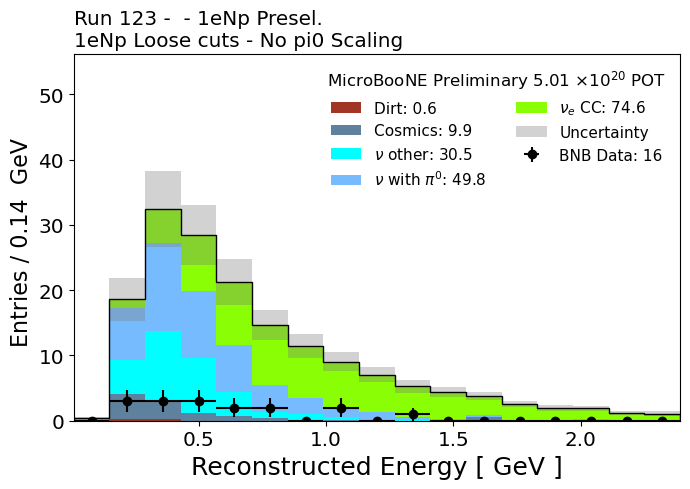

In [12]:
from unblinding_far_sideband import *

# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'None' #'None'
pre_key = 'NP'
sel_key = 'NPL'
#sdb_key = 'TwoPShr'
#pre_key = 'NP'
#sel_key = 'NPBDTAllShr' #'None' 'NPVLAllShr' 'NPLAllShr' 'NPBDTAllShr' 'NPTAllShr'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'

#QUERY += ' and (bnbdata==0 or reco_e>0.85)'
#QUERY += ' and (bnbdata==0)'
#print(QUERY)
        
#formatting can be improved..
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

VARIABLE, BINS, RANGE, XTIT = 'reco_e',7,(0.85, 2.55),r"Reconstructed Energy [ GeV ]"
VARIABLE, BINS, RANGE, XTIT = 'reco_e',21,(0.15, 2.25),r"Reconstructed Energy [ GeV ]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',15,(0.15, 2.25),r"Reconstructed Energy [ GeV ]"
VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.15, 1.55),r"Reconstructed Energy [ GeV ]"
VARIABLE, BINS, RANGE, XTIT = 'reco_e',17,(0.01, 2.39),r"Reconstructed Energy [ GeV ]"

print(VARIABLE, BINS, RANGE, XTIT)

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    #kind="event_category",
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
    #asymErrs=True
)[0:3]

#print('%s %.4f %.4f %.4f' % (VARIABLE, plotter_runbyrun[run].stats['pvaluestatonly'], plotter_runbyrun[run].stats['pvaluediag'], plotter_runbyrun[run].stats['pvalue']))

#ax1.set_ylim(0, ax1.get_ylim()[1]*1.8)

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)
#ax1.set_yscale('log')

plt.tight_layout()

# fix position of chi2 wrt legend
plt.draw()
legleft = (ax1.get_legend().get_window_extent().x0 < 100)
if legleft:
    for a in ax1.get_children(): 
        if len(a.findobj(match=plt.Text))==0: continue
        txt = a.findobj(match=plt.Text)[0]
        if 'n.d.f.' not in txt.get_text(): continue
        #print(txt.get_text())
        txt.set_x(0.80)
# END - fix position of chi2 wrt legend

fig.show()
#save_path = ls.plots_path
#fig.savefig(save_path + '_test_run3_trkpidcut.png', dpi=250)    
#fig.savefig(save_path + 'reco_e_1enp_10bins.pdf', dpi=250)    
#plt.close()
 

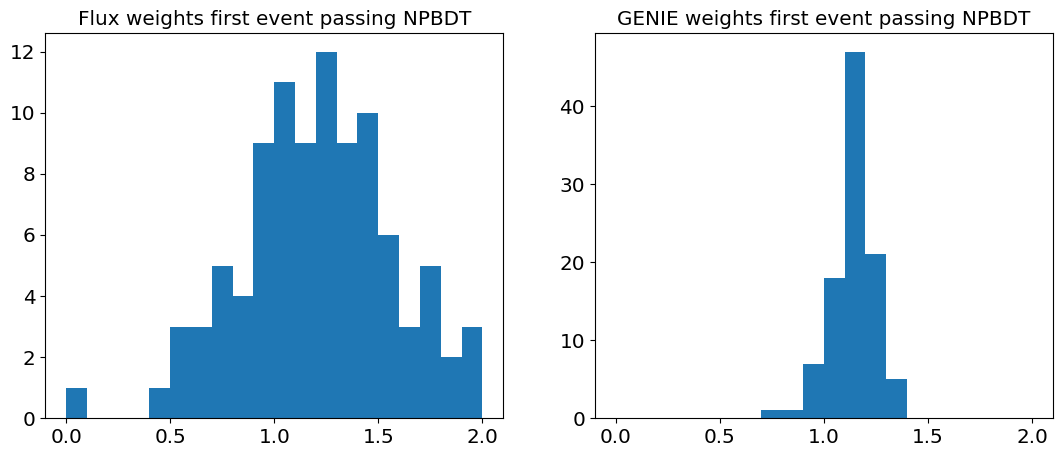

Fitted mean =  64.55862616749904
Fitted standard deviation =  3.86771482682902
Relative uncertainty =  0.05991011668671716
Fitted mean =  67.21420392436765
Fitted standard deviation =  7.783136699684407
Relative uncertainty =  0.11579601104020114


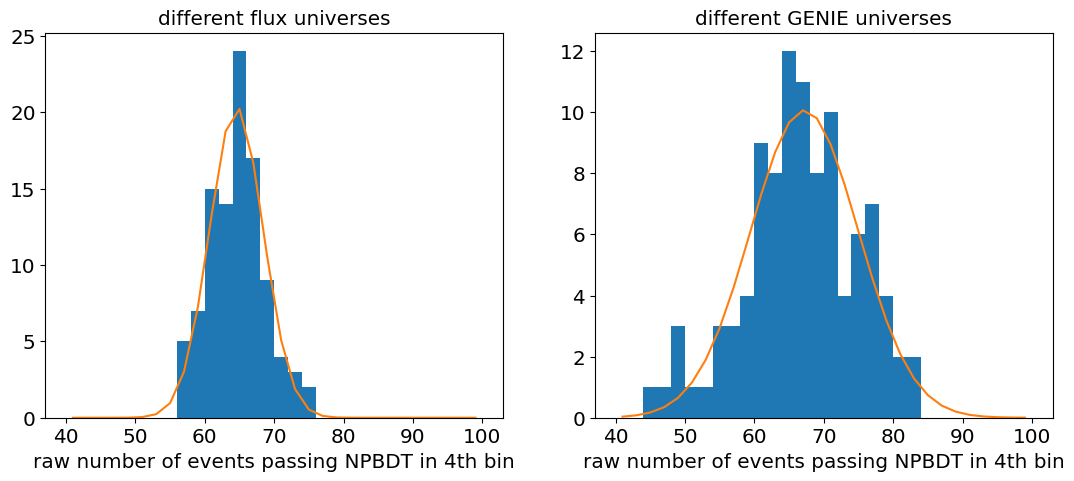

In [13]:
from scipy.optimize import curve_fit
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

NPPRESQ = preselection_categories['NP']['query']
NPLCUTQ =  NPPRESQ+' and '+selection_categories['NPL']['query']
NPBDTCUTQ =  NPPRESQ+' and '+selection_categories['NPBDT']['query']

fig = plt.figure(figsize=(13, 5))
fw = samples['mc'].query(NPBDTCUTQ+' and reco_e>0.57 and reco_e<0.71')[['weightsFlux']]
gw = samples['mc'].query(NPBDTCUTQ+' and reco_e>0.57 and reco_e<0.71')[['weightsGenie']]

a = fw.to_numpy()[0]/1000
b = gw.to_numpy()[0]/1000

plt.subplot(121)
plt.hist(a, bins=20, range=[0,2])
plt.title('Flux weights first event passing NPBDT')

plt.subplot(122)
plt.hist(b, bins=20, range=[0,2])
plt.title('GENIE weights first event passing NPBDT')
plt.show()

fig = plt.figure(figsize=(13, 5))

f = np.stack(fw.to_numpy()[:,0])
f = f.sum(axis=0)/1000
g = np.stack(gw.to_numpy()[:,0])
g = g.sum(axis=0)/1000

plt.subplot(121)
hist, bin_edges, p = plt.hist(f, bins=30, range=[40,100])
plt.title('different flux universes')
plt.xlabel('raw number of events passing NPBDT in 4th bin')
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [200., 65., 10.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)
plt.plot(bin_centres, hist_fit, label='Fitted data')
# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])
print('Relative uncertainty = ', coeff[2]/coeff[1])

plt.subplot(122)
hist, bin_edges, p = plt.hist(g, bins=30, range=[40,100])
plt.title('different GENIE universes')
plt.xlabel('raw number of events passing NPBDT in 4th bin')
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [200., 65., 10.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)
plt.plot(bin_centres, hist_fit, label='Fitted data')
# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])
print('Relative uncertainty = ', coeff[2]/coeff[1])

plt.show()

nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(1486, 16)
(70372, 16)


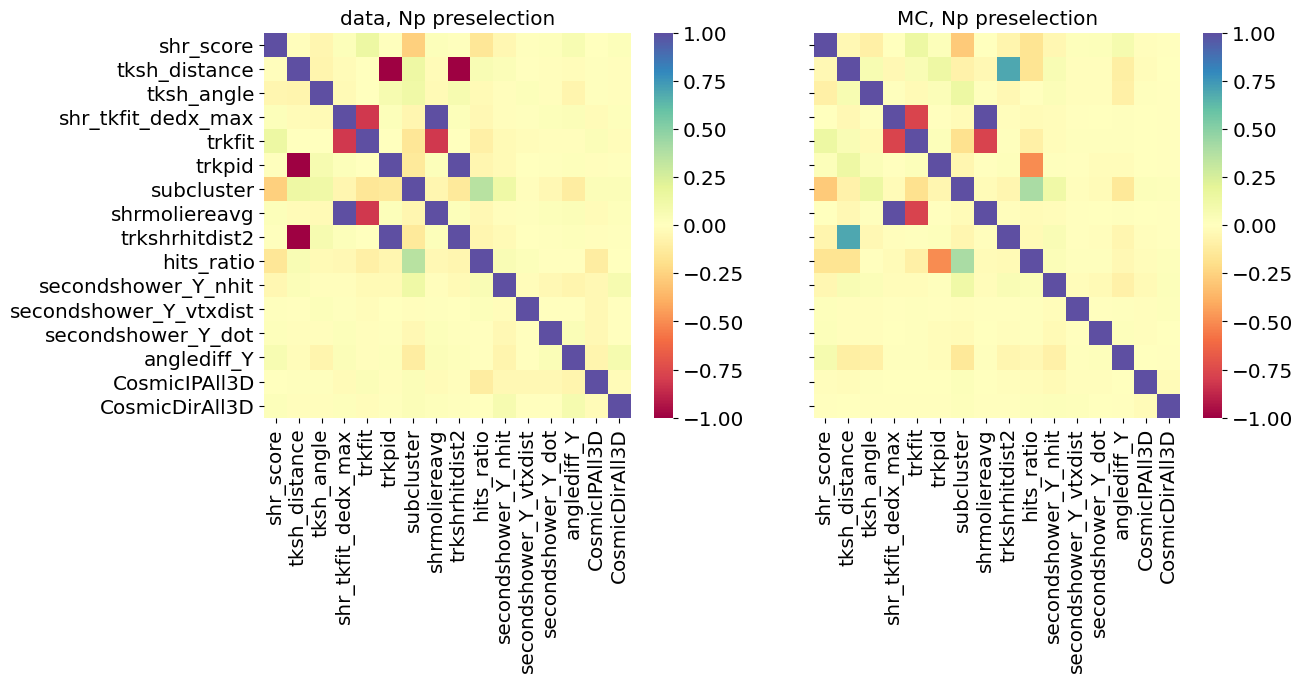

In [14]:
import seaborn as sns

NPPRESQ = preselection_categories['NP']['query']
NPLCUTQ =  NPPRESQ+' and '+selection_categories['NPL']['query']

#sel = NPLCUTQ
sel = NPPRESQ

print(sel)

fig, ax = plt.subplots(1,2, figsize=(13, 5), sharey=True)

#correlation coefficients for BDT variables
d = samples['data'].query(sel)[["shr_score","tksh_distance","tksh_angle","shr_tkfit_dedx_max","trkfit","trkpid",
                                    "subcluster","shrmoliereavg","trkshrhitdist2","hits_ratio","secondshower_Y_nhit",
                                    "secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y","CosmicIPAll3D",
                                    "CosmicDirAll3D"]]
cd = d.corr()
sns.heatmap(cd, xticklabels=cd.columns, yticklabels=cd.columns,cmap='Spectral', ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title('data, Np preselection')
#ax[0].set_title('data, Np Loose')

m = samples['mc'].query(sel)[["shr_score","tksh_distance","tksh_angle","shr_tkfit_dedx_max","trkfit","trkpid",
                                  "subcluster","shrmoliereavg","trkshrhitdist2","hits_ratio","secondshower_Y_nhit",
                                  "secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y","CosmicIPAll3D",
                                  "CosmicDirAll3D"]]

cm = m.corr()
sns.heatmap(cm, xticklabels=cm.columns, yticklabels=cm.columns,cmap='Spectral', ax=ax[1], vmin=-1, vmax=1)
ax[1].set_title('MC, Np preselection')
#ax[1].set_title('MC, Np Loose')

fig.show()
print(np.shape(d))
print(np.shape(m))


nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained == 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_showers_contained == 1 and CosmicIPAll3D > 10. and CosmicDirAll3D > -0.9 and CosmicDirAll3D < 0.9 and shrmoliereavg < 15 and subcluster > 4 and trkfit < 0.65 and secondshower_Y_nhit < 50 and shr_trk_sce_start_y > -100 and shr_trk_sce_start_y < 80 and shr_trk_sce_end_y > -100 and shr_trk_sce_end_y < 100  and shr_trk_len < 300. and (n_tracks_tot == 0 or (n_tracks_tot>0 and tk1sh1_angle_alltk>-0.9)) and n_tracks_contained == 0


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(58, 28)
(2693, 28)


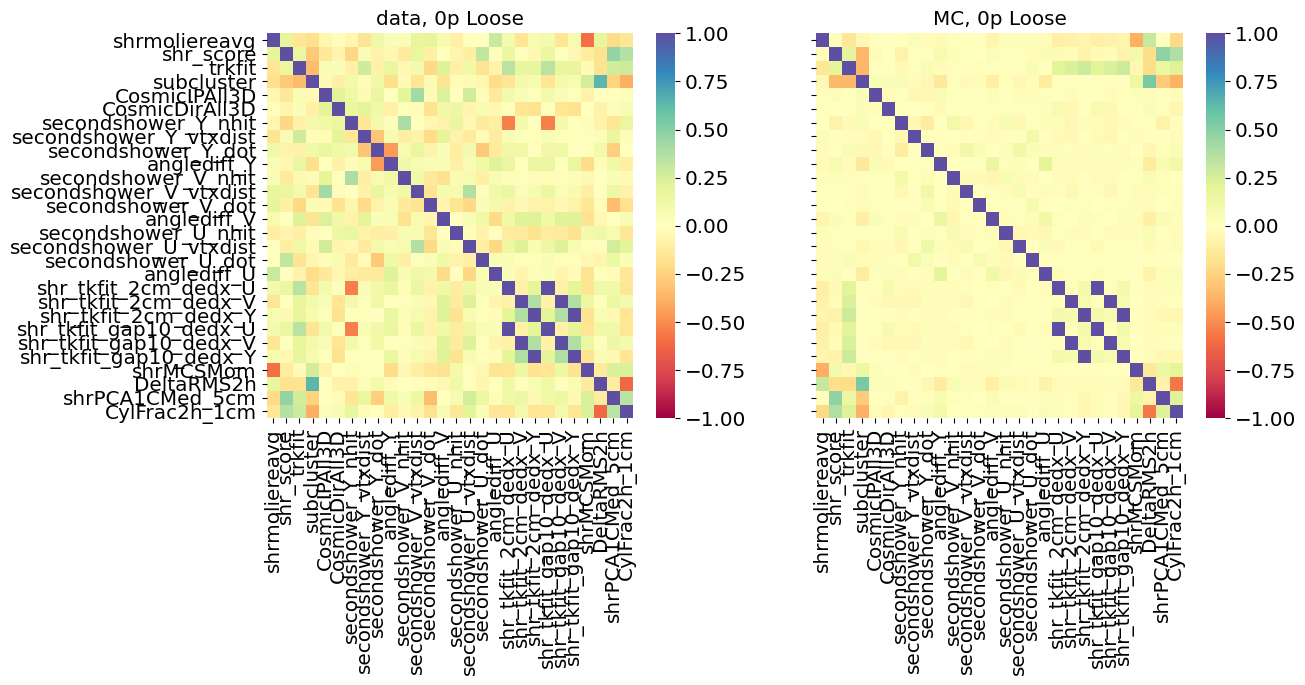

In [15]:
import seaborn as sns

ZPPRESQ = preselection_categories['ZP']['query']
ZPLCUTQ =  ZPPRESQ+' and '+selection_categories['ZPLOOSESEL']['query']

sel = ZPLCUTQ
#sel = ZPPRESQ

print(sel)

fig, ax = plt.subplots(1,2, figsize=(13, 5), sharey=True)

#correlation coefficients for BDT variables
d = samples['data'].query(sel)[['shrmoliereavg','shr_score', "trkfit","subcluster",
                  "CosmicIPAll3D","CosmicDirAll3D",
                  'secondshower_Y_nhit','secondshower_Y_vtxdist','secondshower_Y_dot','anglediff_Y',
                  'secondshower_V_nhit','secondshower_V_vtxdist','secondshower_V_dot','anglediff_V',
                  'secondshower_U_nhit','secondshower_U_vtxdist','secondshower_U_dot','anglediff_U',
                  "shr_tkfit_2cm_dedx_U", "shr_tkfit_2cm_dedx_V", "shr_tkfit_2cm_dedx_Y",
                  "shr_tkfit_gap10_dedx_U", "shr_tkfit_gap10_dedx_V", "shr_tkfit_gap10_dedx_Y",
                  "shrMCSMom","DeltaRMS2h","shrPCA1CMed_5cm","CylFrac2h_1cm"]]
cd = d.corr()
sns.heatmap(cd, xticklabels=cd.columns, yticklabels=cd.columns,cmap='Spectral', ax=ax[0], vmin=-1, vmax=1)
#ax[0].set_title('data, 0p preselection')
ax[0].set_title('data, 0p Loose')

m = samples['mc'].query(sel)[['shrmoliereavg','shr_score', "trkfit","subcluster",
                  "CosmicIPAll3D","CosmicDirAll3D",
                  'secondshower_Y_nhit','secondshower_Y_vtxdist','secondshower_Y_dot','anglediff_Y',
                  'secondshower_V_nhit','secondshower_V_vtxdist','secondshower_V_dot','anglediff_V',
                  'secondshower_U_nhit','secondshower_U_vtxdist','secondshower_U_dot','anglediff_U',
                  "shr_tkfit_2cm_dedx_U", "shr_tkfit_2cm_dedx_V", "shr_tkfit_2cm_dedx_Y",
                  "shr_tkfit_gap10_dedx_U", "shr_tkfit_gap10_dedx_V", "shr_tkfit_gap10_dedx_Y",
                  "shrMCSMom","DeltaRMS2h","shrPCA1CMed_5cm","CylFrac2h_1cm"]]

cm = m.corr()
sns.heatmap(cm, xticklabels=cm.columns, yticklabels=cm.columns,cmap='Spectral', ax=ax[1], vmin=-1, vmax=1)
#ax[1].set_title('MC, 0p preselection')
ax[1].set_title('MC, 0p Loose')

fig.show()
print(np.shape(d))
print(np.shape(m))


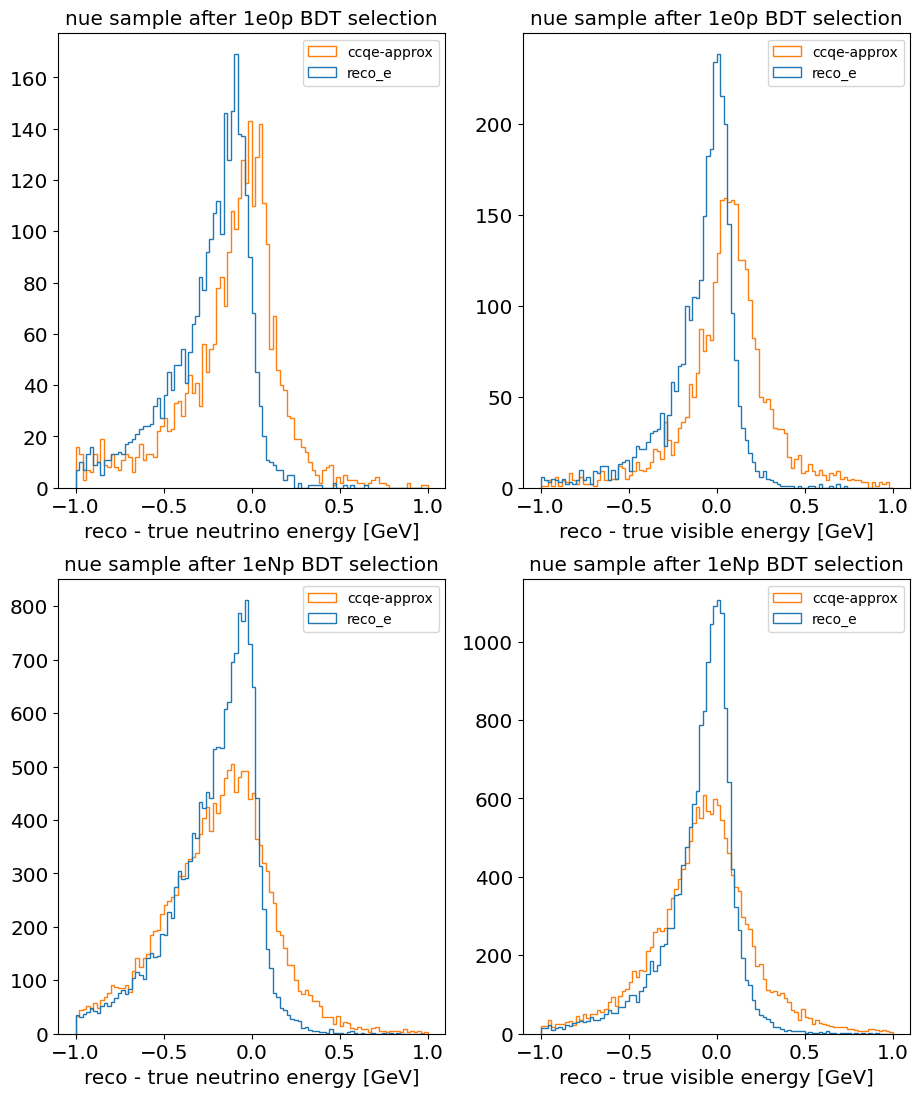

In [16]:
sample = 'nue'

NPPRESQ = preselection_categories['NP']['query']
NPLCUTQ =  NPPRESQ+' and '+selection_categories['NPL']['query']
NPBDTCQ =  NPLCUTQ+' and '+selection_categories['NPBDT']['query']
etn = samples[sample].query(NPBDTCQ)[['nu_e']].values.flatten()
evn = samples[sample].query(NPBDTCQ)[['true_e_visible']].values.flatten()
ern = samples[sample].query(NPBDTCQ)[['reco_e']].values.flatten()
eqn = samples[sample].query(NPBDTCQ)[['reco_e_qe_l']].values.flatten()

ZPPRESQ = preselection_categories['ZP']['query']
ZPLCUTQ =  ZPPRESQ+' and '+selection_categories['ZPLOOSESEL']['query']
ZPBDTCQ =  ZPLCUTQ+' and '+selection_categories['ZPBDT']['query']
et0 = samples[sample].query(ZPBDTCQ)[['nu_e']].values.flatten()
ev0 = samples[sample].query(ZPBDTCQ)[['true_e_visible']].values.flatten()
er0 = samples[sample].query(ZPBDTCQ)[['reco_e']].values.flatten()
eq0 = samples[sample].query(ZPBDTCQ)[['reco_e_qe_l']].values.flatten()

plt.figure(figsize=(11,13))

plt.subplot(221)
plt.hist([er0-et0,eq0-et0], bins=100, range=(-1,1),histtype='step',label=['reco_e','ccqe-approx'])
plt.xlabel("reco - true neutrino energy [GeV]")
plt.title('nue sample after 1e0p BDT selection')
plt.legend()

plt.subplot(222)
plt.hist([er0-ev0,eq0-ev0], bins=100, range=(-1,1),histtype='step',label=['reco_e','ccqe-approx'])
plt.xlabel("reco - true visible energy [GeV]")
plt.title('nue sample after 1e0p BDT selection')
plt.legend()

plt.subplot(223)
plt.hist([ern-etn,eqn-etn], bins=100, range=(-1,1),histtype='step',label=['reco_e','ccqe-approx'])
plt.xlabel("reco - true neutrino energy [GeV]")
plt.title('nue sample after 1eNp BDT selection')
plt.legend()

plt.subplot(224)
plt.hist([ern-evn,eqn-evn], bins=100, range=(-1,1),histtype='step',label=['reco_e','ccqe-approx'])
plt.xlabel("reco - true visible energy [GeV]")
plt.title('nue sample after 1eNp BDT selection')
plt.legend()

plt.show()

[ 3.282e+02 -1.477e-02  1.220e-01  5.980e-01]


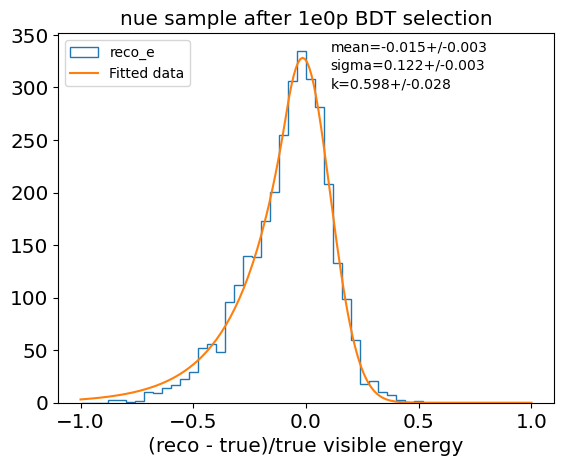

In [17]:
def gauss_exp(x, n, mu, sigma, k):
    sigma = abs(sigma)
    condition = (x - mu) / sigma >= -k    
    y = np.copy(x)
    y[condition] = n * np.exp(-0.5 * ((x[condition] - mu) / sigma)**2)
    y[~condition] = n * np.exp(k**2 / 2 + k * ((x[~condition] - mu) / sigma))
    return y

n,b,p = plt.hist((er0-ev0)/ev0, bins=50, range=(-1,1),histtype='step',label=['reco_e'])
#n,b,p = plt.hist((er0-et0)/et0, bins=50, range=(-1,1),histtype='step',label=['reco_e'])
#n,b,p = plt.hist((ern-evn)/evn, bins=50, range=(-1,1),histtype='step',label=['reco_e'])
#n,b,p = plt.hist((ern-etn)/etn, bins=50, range=(-1,1),histtype='step',label=['reco_e'])
#gaussian fit
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
bin_centres = (b[:-1] + b[1:])/2
coeff, var_matrix = curve_fit(gauss_exp, bin_centres, n, p0=(3000,-0.15,0.1, 1))
print(coeff)
errs = np.sqrt(np.diag(var_matrix))
curvebins = np.linspace(b[0],b[-1],200)
# Get the fitted curve
hist_fit = gauss_exp(curvebins, *coeff)
plt.text(plt.gca().get_xlim()[-1]*0.1,plt.gca().get_ylim()[-1]*0.95,"mean=%.3f+/-%.3f"%(coeff[1],errs[1]))
plt.text(plt.gca().get_xlim()[-1]*0.1,plt.gca().get_ylim()[-1]*0.90,"sigma=%.3f+/-%.3f"%(coeff[2],errs[2]))
plt.text(plt.gca().get_xlim()[-1]*0.1,plt.gca().get_ylim()[-1]*0.85,"k=%.3f+/-%.3f"%(coeff[3],errs[3]))
plt.plot(curvebins, hist_fit, label='Fitted data')
plt.xlabel("(reco - true)/true visible energy")
#plt.xlabel("(reco - true)/true neutrino energy")
#plt.title('nue sample after 1eNp BDT selection')
plt.title('nue sample after 1e0p BDT selection')
plt.legend(loc=2)
plt.show()

# Supplemental material

[0.15 0.35 0.55 0.75 0.95 1.15 1.35 1.55]


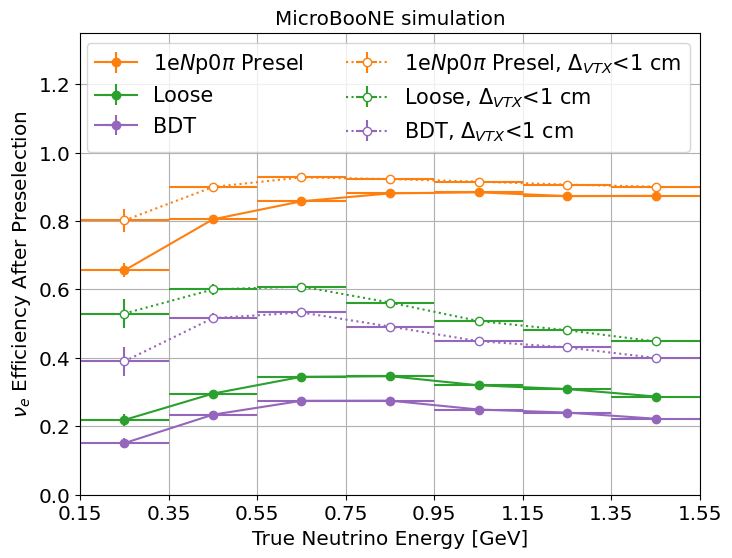

In [18]:
def Eff(df,var,query,acceptance,bin_edges,absval=False):
    #print acceptance
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    bins = []
    bin_eff = []
    bin_err = []
    for i in range(len(bin_centers)):
        binmin = bin_edges[i]
        binmax = bin_edges[i+1]
        bincut = '%s > %f and %s < %f'%(var,binmin,var,binmax)
        if (absval == True):
            bincut = '(%s > %f and %s < %f) or (%s > -%f and %s < -%f)'%(var,binmin,var,binmax,var,binmax,var,binmin)
        if (acceptance != ''): bincut += ' and %s'%acceptance
        #print bincut
        df_tmp =  df.query(bincut) # cut on bin range for desired var.
        df_sub = df_tmp.query(query) # apply constrain 
        if (df_tmp.shape[0] == 0): continue
        eff = df_sub.shape[0] / float( df_tmp.shape[0] )
        err = np.sqrt( eff*(1-eff)/df_tmp.shape[0] )
        bin_eff.append( eff )
        bin_err.append( err )
        bins.append(bin_centers[i])
        #print 'eff = %.02f @ bin = %.02f'%(eff,bin_centers[i])
    return np.array(bins),np.array(bin_eff),np.array(bin_err)

fig, ax = plt.subplots(figsize=(8,6))

bin_edges = np.linspace(0.15,1.55,8)
print(bin_edges)

PRESQ = preselection_categories['NUE']['query']
NPPRESQ = preselection_categories['NP']['query']
NPLCUTQ =  NPPRESQ+' and '+selection_categories['NPL']['query']
NPBDTCQ =  NPLCUTQ+' and '+selection_categories['NPBDT']['query']

nue = samples['nue']

VAR = 'nu_e' #'_pi0_e'
ACCEPTANCE = 'isVtxInFiducial == 1 and truthFiducial == 1 and npi0==0 and npion==0 and nproton>0'
ACCEPTANCE += ' and '
ACCEPTANCE += PRESQ
VTX = ' and dr_s<1.0'

colors = ['C1','C2','C4']

lables = ['1e$N$p0$\pi$ Presel','Loose','BDT']
for i,q in enumerate([NPPRESQ,NPLCUTQ,NPBDTCQ]):
    fmt = 'o-'
    centers,vals,errs = Eff(nue,VAR,q,ACCEPTANCE,bin_edges)
    ax.errorbar(centers,vals,yerr=errs,xerr=(bin_edges[1]-bin_edges[2])/2,fmt=fmt,label=lables[i],color=colors[i])

lables = ['1e$N$p0$\pi$ Presel, $\Delta_{VTX}$<1 cm','Loose, $\Delta_{VTX}$<1 cm','BDT, $\Delta_{VTX}$<1 cm']
for i,q in enumerate([NPPRESQ,NPLCUTQ,NPBDTCQ]):
    fmt = 'o:'
    centers,vals,errs = Eff(nue,VAR,q+VTX,ACCEPTANCE+VTX,bin_edges)
    ax.errorbar(centers,vals,yerr=errs,xerr=(bin_edges[1]-bin_edges[2])/2,label=lables[i],fmt=fmt,color=colors[i],mfc = 'w')
ax.set_xlabel('True Neutrino Energy [GeV]')
ax.set_ylabel(r'$\nu_e$ Efficiency After Preselection')
ax.set_xticks(bin_edges)
ax.set_ylim(0.,1.35)
#ax.set_ylim(0.,0.15)
ax.set_xlim(bin_edges[0],bin_edges[-1])
plt.legend(ncol=2, prop={'size': 15})
#plt.title("dr(shr vtx reco, vtx mc sce)<1.0")
plt.title("MicroBooNE simulation")
plt.grid(True)
#plt.yscale('log')
plt.show()
#fig.savefig(ls.plots_path+"eff_1eNp_cut_bdt.pdf")
fig.savefig(ls.plots_path+"eff_1eNp_vtx1cm_presel.pdf")

In [19]:
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',21,(0.05, 2.15),r"reco energy"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',7,(0.05, 2.85),r"Reconstructed Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_score',6,(0,1),r"pi0 score"
#VARIABLE, BINS, RANGE, XTIT = 'nu_e',20,(0,2),r"true neutrino energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_e',10,(0,1),r"pi0 energy"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_score',5,(0.5,1),r"BDT $\pi^0$ score"
#VARIABLE, BINS, RANGE, XTIT = 'bkg_score',10,(0,1),r"bkg score"
#VARIABLE, BINS, RANGE, XTIT = 'nonpi0_score',6,(0,1),r"non-pi0 score"
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(-0.5, 9.5),"n showers contained"
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',1,(0.5, 1.5),"n showers contained"
#VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',10,(-0.5, 9.5),"n tracks contained"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',10,(-0.5, 9.5),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',15,(0, 10),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_distance',20,(0, 40),"trk-shr distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'trkshrhitdist2',20,(0, 20),"trk-shr hit dist Y"
#VARIABLE, BINS, RANGE, XTIT = 'trkpid',15,(-1, 1),"trk PID"
#VARIABLE, BINS, RANGE, XTIT = 'secondshower_Y_nhit',20,(0, 100),"secondshower Y nhit"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_angle',10,(-1, 1),"trk-shr angle"
#VARIABLE, BINS, RANGE, XTIT = 'ismerged',2,(-0.5, 1.5),"is merged"
#VARIABLE, BINS, RANGE, XTIT = 'merge_bestdot',20,(-1, 1),"merge bestdot"
#VARIABLE, BINS, RANGE, XTIT = 'merge_bestdist',20,(0, 40),"merge bestdist"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.85,2.65),r"Reconstructed Energy [GeV]"

#VARIABLE, BINS, RANGE, XTIT = 'trkpid',21,(-1,1),"track LLR PID"
#VARIABLE, BINS, RANGE, XTIT = 'hits_ratio',20,(0,1),"shower hits/all hits"
#VARIABLE, BINS, RANGE, XTIT = 'shrmoliereavg',20,(0,50),"average Moliere angle [degrees]"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster',20,(0,40),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster',20,(0,20),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster2',10,(0.5,20.5),"N sub-clusters in sub-leading shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster2',10,(0.,20.),"N sub-clusters in sub-leading shower"
#VARIABLE, BINS, RANGE, XTIT = 'shr2pid',15,(-1, 1),"shr2 PID"
#VARIABLE, BINS, RANGE, XTIT = 'tk1sh2_distance',20,(0, 100),"trk1-shr2 distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_score',10,(0,0.5),r"shr2 score"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_id',10,(-0.5,9.5),r"shr2 id"
#VARIABLE, BINS, RANGE, XTIT = 'shrsubclustersold',20,(0,40),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'deltashrsbcfix',21,(-10.5,10.5),"subcluster-shrsubclustersfix"
#VARIABLE, BINS, RANGE, XTIT = 'deltashr2sbcfix',21,(-10.5,10.5),"subcluster-shr2subclustersfix"
#VARIABLE, BINS, RANGE, XTIT = 'trkfit',10,(0,1.0),"Fraction of Track-fitted points"
#VARIABLE, BINS, RANGE, XTIT = 'CosmicIPAll3D',20,(0,200),"CosmicIPAll3D [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_distance',12,(0,6),"trk-shr distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',15,(0,10),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_angle',20,(-1,1),"cos(trk-shr angle)"
#VARIABLE, BINS, RANGE, XTIT = 'shr_trk_len',20,(0,400),"shr trk len [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_nhits',20,(0,1000),"shr2 nhits"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_energy',20,(0,250),"shr2 energy"

#VARIABLE, BINS, RANGE, XTIT = 'trk_len',20,(0,200),"trk len [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'shr12_cos_p1_dstart',20,(-1,1),"cos(shr1_dir,shr2_start-shr1_start)"
#VARIABLE, BINS, RANGE, XTIT = 'shr12_cos_p1_dstart',20,(0.8,1),"cos(shr1_dir,shr2_start-shr1_start)"

#VARIABLE, BINS, RANGE, XTIT = 'is_shr2splt',2,(-0.5,1.5),"is shr2splt"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk1bad',2,(-0.5,1.5),"is trk1bad"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk2srtshr',2,(-0.5,1.5),"is trk2srtshr"
#VARIABLE, BINS, RANGE, XTIT = 'is_shr2prtn',2,(-0.5,1.5),"is shr2prtn"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk1embd',2,(-0.5,1.5),"is trk1embd"
#VARIABLE, BINS, RANGE, XTIT = 'trk_distance',10,(0, 300),"trk-vtx distance"
#VARIABLE, BINS, RANGE, XTIT = 'trk_len',20,(0, 400),"trk len"

#VARIABLE, BINS, RANGE, XTIT = 'sh1sh2_distance',20,(0,200),"sh1sh2 distance [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',12,(0,252),"vtx x [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',12,(-120,120),"vtx y [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',12,(0,996),"vtx z [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'protonenergy',12,(0,0.6),"proton kinetic energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_theta',21,(0,3.14),r"Shower $\theta$"
#VARIABLE, BINS, RANGE, XTIT = 'trk_theta',21,(0,3.14),r"Track $\theta$"

In [29]:
# store text files with selected events (needed input to produce SBNFit NTuples)

# thruth-cut on MC sample to avoid double counting with truth-filters (i.e. ccpi0, ncpi0, cccpi, ...)
NU_Q = "~(abs(nu_pdg) == 12 & ccnc == 0)"
NU_Q += " & ~(mcf_np0==1 & mcf_nmp==0 & mcf_nmm==0 & mcf_nem==0 & mcf_nep==0)"
NU_Q += " & ~(mcf_pass_ccpi0==1)"
NU_Q += " & ~(mcf_pass_ccnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_ncnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_cccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_nccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"


print (ls.ntuple_path)

for key, df in samples.items():
    #print ('sample : ',key)
    #continue
    fout = open(ls.ntuple_path+'SBNFit/'+key+'.txt','w')
    dfsel = df.query(QUERY)
    if (key == 'mc'):
        dfsel = dfsel.query(NU_Q)
    if (key != 'data'):
        print ('weight for sample %s is %.05f'%(key,this_weights[key]))
    print ('sample %s has %i selected entries'%(key,dfsel.shape[0]))
    for i,row in dfsel.iterrows():
        run = row['run']
        sub = row['sub']
        evt = row['evt']
        fout.write('%i %i %i \n'%(run,sub,evt))
    fout.close()


/uboone/data/users/cthorpe/PELEE/
weight for sample mc is 0.08884
sample mc has 84 selected entries
run= 7054
weight for sample nue is 0.00179
sample nue has 23327 selected entries
run= 18953
sample data has 17 selected entries
run= 14587
weight for sample ext is 0.14695
sample ext has 56 selected entries
run= 7513
weight for sample dirt is 0.16261
sample dirt has 3 selected entries
run= 7017
weight for sample lee is 0.00179
sample lee has 23327 selected entries
run= 18953
weight for sample ccnopi is 0.01816
sample ccnopi has 430 selected entries
run= 7049
weight for sample cccpi is 0.01335
sample cccpi has 221 selected entries
run= 7017
weight for sample ncnopi is 0.01580
sample ncnopi has 91 selected entries
run= 7054
weight for sample nccpi is 0.00750
sample nccpi has 475 selected entries
run= 7004
weight for sample ncpi0 is 0.01784
sample ncpi0 has 1005 selected entries
run= 11134
weight for sample ccpi0 is 0.05948
sample ccpi0 has 172 selected entries
run= 7054


In [21]:
# just a simple check to verify there are no NaN in data
samples['data'].columns[samples['data'].isna().any()].tolist()

['elec_px', 'elec_py', 'run30']

In [28]:
#print(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]])#,"pi0_score"
#samples['data'].query(QUERY)[["run","sub","evt","reco_e","n_showers_contained","n_tracks_contained","tksh_distance","shr_tkfit_dedx_max","trkpid","hits_ratio","trkfit","tksh_angle","subcluster","shrmoliereavg","trkshrhitdist2","shr_trk_len","shr_score","pi0_score","nonpi0_score"]] 
samples['data'].query(QUERY)[["run","sub","evt","reco_e","n_showers_contained","n_tracks_contained","tksh_distance","shr_tkfit_dedx_max","trkpid","pi0_score","nonpi0_score"]] 
print("run=",run)

run= 7054


In [31]:
#print(samples['data'].query(QUERY)[["run","sub","evt"]])
#QUERY=" and ".join([HIGH_ENERGY_EXT,BDTCQ])
print(QUERY)
#print(len(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]]))
pd.set_option('display.max_rows', 100)
#print(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]])

#from significance_calculator import significanceCalculator
run = 123

this_cov = plotter_runbyrun[run].cov + plotter_runbyrun[run].cov_mc_stat
expected_bin_contents = {'bg': out[3][0][-1],
                         'signal': np.zeros(out[3][0][-1].shape)}
observed_bin_contents = plotter_runbyrun[run].data
this_pot = pot_data_unblinded[which_sideband[1]][run][0]

my_signif = significanceCalculator(expected_bin_contents, pot=this_pot)
my_signif.setCovarianceMatrix(this_cov, is_cov='cov')

fig, ax = my_signif.testStatisticsWithData(0, 1, 
                                           observed_bin_contents, 
                                           chi2_pdf_superimposed=True, 
                                           n_toy=100000, 
                                           n_bins=100, 
                                           range=[0,40],
                                           title=f'Run {run}, {XTIT}, N bins = {BINS}\n',
                                           test_stat='chi2_cnp')

nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and n_showers_contained == 1


NameError: name 'out' is not defined

# Multiple variable plotting

In [32]:
from unblinding_far_sideband import *

dirappend = ""

#plot_variables = [('reco_e',7,(0.05,2.85),r"Reconstructed Energy [GeV]","coarse")]

#plot_variables = [
#                  ('shrmoliereavg',10,(0,10),"average Moliere angle [degrees]","zoomed"),
#                  ('subcluster',20,(0,80),"N sub-clusters in shower","extended"),
#                  ('tksh_distance',12,(0,6),"trk-shr distance [cm]","zoomed"),
#                  ('nonpi0_score',6,(0,1.0),"BDT non-$\pi^0$ score"),
#                  ('pi0_score',6,(0,1.0),"BDT $\pi^0$ score"),
#                  ('bkg_score',10,(0,1.0),"1e0p BDT score"),
#                  ('reco_e',7,(0.05,2.85),r"Reconstructed Energy [GeV]","coarse"),
#                  ('reco_e',21,(0.05,2.15),r"Reconstructed Energy [GeV]"),
#                  ('reco_e',20,(0.05,3.05),r"Reconstructed Energy [GeV]","extended"),
#]
#plot_variables = kinematic_variables
#plot_variables = energy_variables

# choose sideband, preselection, and selection(s)
# find defintions in unblinding_far_sideband.py
sdb_key = 'HiEext'
pre_key = 'NPOneShr'
sel_keys = ['None','NPVL','NPL','NPBDT'] #['None','NPVL','NPL','NPBDT','NPT']
#sdb_key = 'TwoPShr'
#pre_key = 'NP'
#sel_keys = ['None','NPVLAllShr','NPLAllShr','NPBDTAllShr','NPTAllShr'] #['None','NPVLAllShr','NPLAllShr','NPBDTAllShr','NPTAllShr']
#sdb_key = 'LPID'
#pre_key = 'NP'
#sel_keys = ['None','NPVL','NPL']#
runs = [123] #[1,2,3,12,123]

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]

for run in runs:
    for sel_key in sel_keys:
        sel =  selection_categories[sel_key]
        print('\nRun %i, %s, %s, %s'%(run, sideband['dir'], preselection['dir'], sel['dir']))
        if (which_sideband[1] == "opendata"):
            this_folder = ls.plots_path+'PELEE_opendata/'
        elif (which_sideband[1] == "fulldata"):
            this_folder = ls.plots_path+'PELEE_fulldata/'
        else:
            this_folder = ls.plots_path+'PELEE_far_sideband_runbyrun'+dirappend+'/'
        this_folder += 'run_{}/'.format(run)
        this_folder += '{}_{}_{}'.format(sideband['dir'], preselection['dir'], sel['dir'])
        this_folder += (pi0scaling["suffix"]+'/')
        !mkdir -p $this_folder

        this_query = ""
        for query in [sideband['query'],preselection['query'],sel['query']]:
            if query is None: continue
            if this_query: this_query += ' and '
            this_query += query
        if run in [1, 2, 3, 12]:
            this_query += f' and run{run}==True'

        #formatting can be improved..
        this_title = ""
        for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
            if text is None: continue
            this_title += text

        pvalues = [[] for _ in range(len(pvaluetypes))]
        
        for plot_variable in plot_variables:
            VARIABLE, BINS, RANGE, XTIT = plot_variable[0:4]
            #if VARIABLE != 'tksh_angle': continue
            #if len(plot_variable)>4 or VARIABLE not in TRAINVAR: continue
            print(VARIABLE, BINS, RANGE, XTIT)
            fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
                VARIABLE,   
                query=this_query,
                kind="event_category",
                #kind="paper_category",
                draw_sys=True,
                detsysdict=DETSYS,
                DETSYSPATH=DETSYSPATH,
                COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
                ratio=True,
                stacksort=3,
                title=XTIT,
                bins=BINS,
                range=RANGE,
                chisq=True,
            )[0:3]

            if len(plot_variable) == 6:
                if plot_variable[5] is True:
                    ax1.set_yscale('log')
            else:
                ax1.set_ylim(0, ax1.get_ylim()[1]*1.8) 

            # fix position of chi2 wrt legend
            plt.draw()
            legleft = (ax1.get_legend().get_window_extent().x0 < 100)
            if legleft:
                for a in ax1.get_children(): 
                    if len(a.findobj(match=plt.Text))==0: continue
                    txt = a.findobj(match=plt.Text)[0]
                    if 'n.d.f.' not in txt.get_text(): continue
                    #print(txt.get_text())
                    txt.set_x(0.80)
            # END - fix position of chi2 wrt legend

            ax1.set_title(this_title, loc='left')

            plt.tight_layout()
            save_path = this_folder+VARIABLE
            if len(plot_variable) >= 5:
                save_path += ('_' + plot_variable[4])
            fig.savefig(save_path + '.pdf', dpi=250)    
            #fig.savefig(save_path + '.png', dpi=250)    
            plt.close()
            # store pvalues
            if len(plot_variable)==4 and VARIABLE in TRAINVAR:
                for idx, pvt in enumerate(pvaluetypes):
                    pvalues[idx].append(plotter_runbyrun[run].stats[pvt])
            #print ('%s %.04f'%(VARIABLE,plotter_runbyrun[run].stats['chisqstatonly']))
            print('%s %.4f %.4f %.4f' % (VARIABLE, plotter_runbyrun[run].stats['pvaluestatonly'], plotter_runbyrun[run].stats['pvaluediag'], plotter_runbyrun[run].stats['pvalue']))
        # make pvalue plots
        #print(pvalues)
        for idx, pvt in enumerate(pvaluetypes):
            if len(pvalues[idx])!=16: continue
            plt.figure(figsize=(9, 7))
            plt.hist(pvalues[idx], bins=10, range=(0,1))
            plt.title(this_title, loc='left')
            plt.xlabel(pvt)
            plt.ylabel("number of BDT input variables")
            plt.savefig(this_folder + pvt + '.pdf', dpi=250)
            plt.close()


Run 123, HiEext, NPOneShr, None


OSError: [Errno 12] Cannot allocate memory

In [ ]:
samples['data'].query(QUERY)[["run","sub","evt","reco_e","pi0_score","nonpi0_score","n_showers_contained","n_tracks_contained","reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z"]]